In [1]:
import json
 
# Opening JSON file
f = open('DataAnnotation.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)

In [2]:
len(data)

39

In [3]:
filenames = []
for i in data:
    filenames.append(i['original_filename'])
print(sorted(filenames))

['005_Nonverbal_In.wav', '005_Talking_In.wav', '005_no_talking_in.wav', '006_No_Talking_Out.wav', '006_Nonverbal_In.wav', '006_Talking_In.wav', '007_No_Talking_In.wav', '007_Nonverbal_In.wav', '007_Talking_In.wav', '008_No_Talking_In.wav', '008_Nonverbal_In.wav', '008_Talking_Out.wav', '009_No_Talking_In.wav', '009_Nonverbal_In.wav', '009_Talking_In.wav', '010_No_Talking_In.wav', '010_Nonverbal_In.wav', '010_Talking_In.wav', '011_No_Talking_Out.wav', '011_Nonverbal_Out.wav', '011_Talking_Out.wav', '012_No_Talking_Out.wav', '012_Nonverbal_Out.wav', '012_Talking_Out.wav', '013_No_Talking_Out.wav', '013_Nonverbal_Out.wav', '013_Talking_Out.wav', '014_No_Talking_Out.wav', '014_Nonverbal_Out.wav', '014_Talking_Out.wav', '015_No_Talking_Out.wav', '015_Nonverbal_Out.wav', '015_Talking_Out.wav', '016_No_Talking_Out.wav', '016_Nonverbal_Out.wav', '016_Talking_Out.wav', '017_No_Talking_In.wav', '017_Nonverbal_In.wav', '017_Talking_In.wav']


In [7]:
from scipy.io import savemat
from scipy.io import wavfile
import os
import numpy as np

labelsp = 10000
class_num = 8
version = "v1"
savepath = os.path.join('processedData',version)

for i in range(len(data)):
    file_name = data[i]['original_filename']
    splitedname = file_name.lower().split("_")
    
    if "talking" in splitedname:
        if "no" in splitedname:
            filepath = os.path.join('Murata_IRB_Data',splitedname[0],"Trial_1_No_Talking",file_name)
            save_file_name = splitedname[0]+"_1_single.mat"
        else:
            filepath = os.path.join('Murata_IRB_Data',splitedname[0],"Trial_2_Talking",file_name)
            save_file_name = splitedname[0]+"_2_single.mat"
    else:
        filepath = os.path.join('Murata_IRB_Data',splitedname[0],"Trial_3_Nonverbal",file_name)
        save_file_name = splitedname[0]+"_3_single.mat"
        
    samplerate, audiodata = wavfile.read(filepath)
    labels = [[0]*class_num+[1]]*(int(len(audiodata)/samplerate*labelsp))
    labels = np.array(labels)
    for seg in data[i]['segmentations']:
        for anno in seg['annotations'].keys():
            label = seg['annotations'][anno]['values']["id"]
        start = int(seg['start_time']*labelsp)
        end = int(seg['end_time']*labelsp)
        cur_label = [0]*(class_num+1)
        cur_label[label-1] = 1
        if sum(cur_label) == 0:
            print("error!")
        labels[start:end,:] = cur_label

C:\Users\yuhan\AppData\Local\Temp\ipykernel_1788\3482383997.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, "int16")


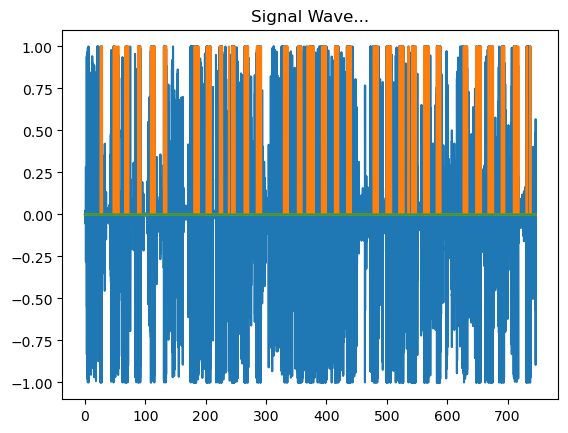

In [9]:
# Visualization
import wave
import numpy as np
import matplotlib.pyplot as plt 

spf = wave.open(filepath, "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "int16")
fs = spf.getframerate()

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(signal) / fs, num=len(signal))
Time1 = np.linspace(0, len(labels) / labelsp, num=len(labels))

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal/max(signal))
plt.plot(Time1, np.array(labels)[:,0])
plt.plot(Time1, np.array(labels)[:,1])

plt.show()